<a href="https://colab.research.google.com/github/marurun66/movie_recommend/blob/main/%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98%EB%A5%BC_%EC%9D%B4%EC%9A%A9%ED%95%9C_%EC%B6%94%EC%B2%9C%EC%8B%9C%EC%8A%A4%ED%85%9C(%EC%98%81%ED%99%94%EC%B6%94%EC%B2%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#상관계수를 이용한 추천시스템
#코사인 유사도를 이용한 추천 시스템


In [ ]:
#데이터 가져오기
import pandas as pd

In [ ]:
#파일 넣기
#content 폴더에서 작업중이다
#"파일이 다른 곳에 저장되었는지 확인합니다. 이 런타임이 종료되면 이 런타임의 파일이 삭제됩니다" < 컴퓨터 반납한다는뜻

In [ ]:
df_movie=pd.read_csv('movie_title.csv')

In [ ]:
df_rating=pd.read_csv('movie_review.csv')

In [ ]:
df_rating.head(3)
#1980년? 이후의 시간을 초로 계산함 / 다시불러오면 날짜로나올것임

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116


In [ ]:
df_movie.head(3)

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)


In [ ]:
#유저 아이디 1번이 어떤 영화에 별점을 몆점 줬는가?
df_rating[df_rating['user_id']==1]

,user_id,item_id,rating,timestamp
202,1,61,4,878542420
305,1,189,3,888732928
333,1,33,4,878542699
334,1,160,4,875072547
478,1,20,4,887431883
...,...,...,...,...
92049,1,28,4,875072173
92487,1,172,5,874965478
94019,1,122,3,875241498
96699,1,152,5,878542589


In [ ]:
df=pd.merge(df_rating,df_movie, on='item_id')
#추천시스템은 리뷰가 필요함. left조인 안해도되다.

In [ ]:
df[df['user_id']==1]

,user_id,item_id,rating,timestamp,title
202,1,61,4,878542420,Three Colors: White (1994)
305,1,189,3,888732928,"Grand Day Out, A (1992)"
333,1,33,4,878542699,Desperado (1995)
334,1,160,4,875072547,Glengarry Glen Ross (1992)
478,1,20,4,887431883,Angels and Insects (1995)
...,...,...,...,...,...
92049,1,28,4,875072173,Apollo 13 (1995)
92487,1,172,5,874965478,"Empire Strikes Back, The (1980)"
94019,1,122,3,875241498,"Cable Guy, The (1996)"
96699,1,152,5,878542589,Sleeper (1973)


In [ ]:
#전체 데이터 몇개?
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [ ]:
#각 영화별로 리뷰개수와 별점 평균 알아보기
#타이틀로 그룹바이

#리뷰 개수
df.groupby('title')['rating'].count().sort_values()

,rating
title,
Á köldum klaka (Cold Fever) (1994),1
Mille bolle blu (1993),1
Mat' i syn (1997),1
Marlene Dietrich: Shadow and Light (1996),1
"Man from Down Under, The (1943)",1
...,...
Liar Liar (1997),485
Return of the Jedi (1983),507
Fargo (1996),508


In [ ]:
df['title'].nunique()

1664

In [ ]:
df_movie['title'].nunique()

1664

In [ ]:
#추천시스템은 리뷰 필수! 리뷰테이블로 작업한다.

In [ ]:
df.shape

(100000, 5)

In [ ]:
#리뷰는 10만개

In [ ]:
#각 영화별 리뷰의 개수를 차트로 나타내세요.
#어떤 영화는 리뷰가 많고, 어떤 영화는 리뷰가 적은지 리뷰개수의 분포를 알 수 있다.

In [ ]:
df['title'].value_counts()

,count
title,
Star Wars (1977),583
Contact (1997),509
Fargo (1996),508
Return of the Jedi (1983),507
Liar Liar (1997),485
...,...
"Leopard Son, The (1996)",1
Stefano Quantestorie (1993),1
Quartier Mozart (1992),1


In [ ]:
#그룹바이는 인덱스로 정렬, 발류카운트 는 (체크하기) 📌

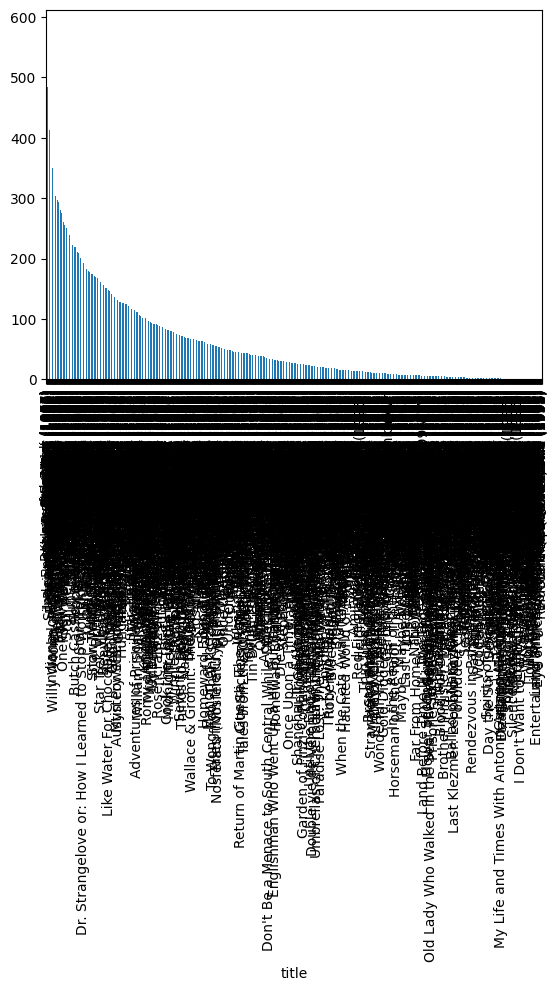

In [ ]:
import matplotlib.pyplot as plt
df['title'].value_counts().plot(kind='bar')
plt.show()

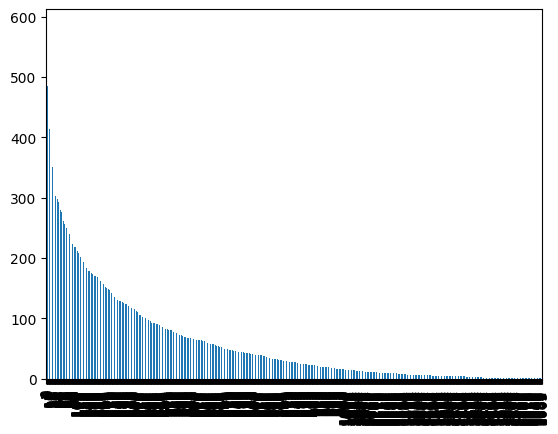

In [ ]:
#보기 좀 더 낫게
df['title'].value_counts().reset_index(drop=True).plot(kind='bar')
plt.show()

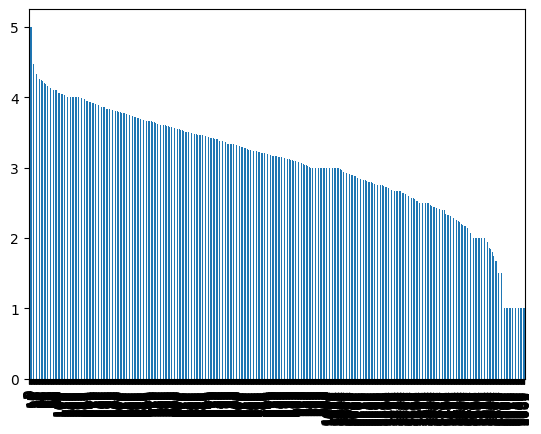

In [ ]:
#각 영화별 별점 평균
df.groupby('title')['rating'].mean().sort_values(ascending=False).reset_index(drop=True).plot(kind='bar')
plt.show()

In [ ]:
#영화 리뷰개수, 별점평균을 데이터 프레임으로 가져온다.
#📌agg() 체크
df.groupby('title')['rating'].agg(['count','mean'])

,count,mean
title,,
'Til There Was You (1997),9,2.333333
1-900 (1994),5,2.600000
101 Dalmatians (1996),109,2.908257
12 Angry Men (1957),125,4.344000
187 (1997),41,3.024390
...,...,...
Young Guns II (1990),44,2.772727
"Young Poisoner's Handbook, The (1995)",41,3.341463
Zeus and Roxanne (1997),6,2.166667


In [ ]:
df_count_mean=df.groupby('title')['rating'].agg(['count','mean'])

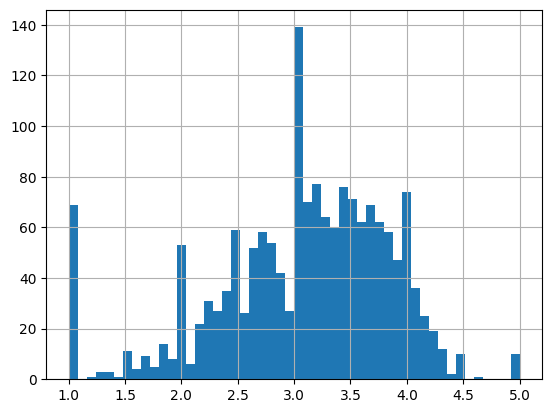

In [ ]:
#mean 컬럼으로 히스토그램 그리기, bin 개수는 50
df_count_mean['mean'].hist(bins=50)
plt.show()


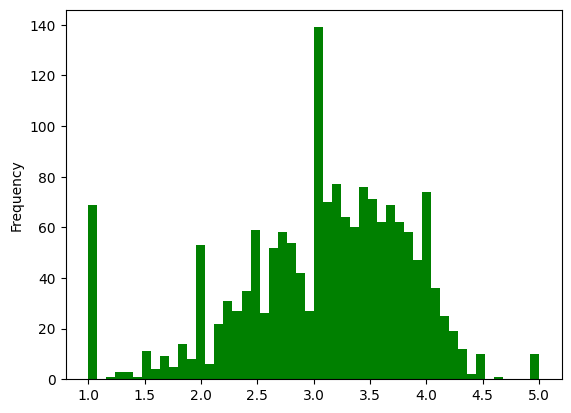

In [ ]:
df_count_mean['mean'].plot(kind='hist',bins=50,color='green')
plt.show()

In [ ]:
#히스토그램을 통해 몇점이 제일 많은지 알 수 있다. #3-3.5사이에 분포하고있네

In [ ]:
#최대점수, 최소점수 영화를 찾아보자
df_count_mean.describe()

,count,mean
count,1664.000000,1664.000000
mean,60.096154,3.077018
std,80.956484,0.780418
min,1.000000,1.000000
25%,7.000000,2.665094
50%,27.000000,3.162132
75%,80.250000,3.651808
max,583.000000,5.000000


In [ ]:
df_count_mean.loc[df_count_mean['mean']==5]

,count,mean
title,,
Aiqing wansui (1994),1,5.0
Entertaining Angels: The Dorothy Day Story (1996),1,5.0
"Great Day in Harlem, A (1994)",1,5.0
Marlene Dietrich: Shadow and Light (1996),1,5.0
Prefontaine (1997),3,5.0
"Saint of Fort Washington, The (1993)",2,5.0
Santa with Muscles (1996),2,5.0
Someone Else's America (1995),1,5.0
Star Kid (1997),3,5.0


In [ ]:
#각 영화 유사도를 계산해서 추천해줘야 하는데 (협업 필터링-아이템간에 비슷한지, 유저간에 비슷한지 = 현업에선 아이템간 유사도로 추천함)
#리뷰개수가 하나짜리면, 추천 신뢰도가 떨어진다. 제외해야함!

#별점 1점

df_count_mean.loc[df_count_mean['mean']==1].sort_values('count',ascending=False)

,count,mean
title,,
3 Ninjas: High Noon At Mega Mountain (1998),5,1.0
Amityville 1992: It's About Time (1992),5,1.0
Amityville: A New Generation (1993),5,1.0
"Mighty, The (1998)",3,1.0
Gordy (1995),3,1.0
...,...,...
Lashou shentan (1992),1,1.0
"Leopard Son, The (1996)",1,1.0
Lotto Land (1995),1,1.0


In [ ]:
#item_based collaboratibe filtering
#유저베이스의 한계 - 아이템개수보다 유저가 많아지면 복잡도가 올라감
#아이템 베이스의 한계 - 유저의 기호는 변한다.
#두 아이템간의 유사도 측정 = 상관계수 이용

#좋아하다 라는걸 컴퓨터가 어떻게 이해하는가 - 컴퓨터는 숫자로 이해한다.
#숫자 : 크기와 방향 (백터-코사인유사도이용해서 계산) 좋아한다, 사랑한다  -------- 싫어한다, 혐오한다

In [ ]:
df

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,186,302,3,891717742,L.A. Confidential (1997)
2,22,377,1,878887116,Heavyweights (1994)
3,244,51,2,880606923,Legends of the Fall (1994)
4,166,346,1,886397596,Jackie Brown (1997)
...,...,...,...,...,...
99995,880,476,3,880175444,"First Wives Club, The (1996)"
99996,716,204,5,879795543,Back to the Future (1985)
99997,276,1090,1,874795795,Sliver (1993)
99998,13,225,2,882399156,101 Dalmatians (1996)


In [ ]:
#각 영화별 상관계수를 어떻게 뽑을 것인가
#별점으로
#corr (상관계수) 복습
df_car=pd.read_csv('fuel_econ.csv')

In [ ]:
df_car.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6


In [ ]:
df_car.columns


Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

In [ ]:
#배기량 displ, 연비comb 의 관계 구하기
df_car[['displ','comb']].corr()

,displ,comb
displ,1.000000,-0.758397
comb,-0.758397,1.000000


In [ ]:
df_car.corr(numeric_only=True)

,id,year,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
id,1.000000,0.985668,-0.060096,-0.074666,-0.006569,-0.021951,0.091800,0.091225,0.090593,0.095359,0.093803,-0.099717,-0.127873,-0.122321
year,0.985668,1.000000,-0.055313,-0.070424,0.006232,-0.033643,0.068050,0.066742,0.073290,0.077641,0.071993,-0.081165,-0.149829,-0.145141
cylinders,-0.060096,-0.055313,1.000000,0.933872,0.247571,-0.004264,-0.693103,-0.666029,-0.766275,-0.771503,-0.738023,0.848274,-0.783858,-0.781815
displ,-0.074666,-0.070424,0.933872,1.000000,0.259336,0.022072,-0.713479,-0.686166,-0.783984,-0.788457,-0.758397,0.855375,-0.793432,-0.791216
pv2,-0.006569,0.006232,0.247571,0.259336,1.000000,-0.665642,-0.278109,-0.272546,-0.296808,-0.298504,-0.290883,0.287200,-0.296088,-0.293156
pv4,-0.021951,-0.033643,-0.004264,0.022072,-0.665642,1.000000,0.035188,0.037869,0.074952,0.077442,0.047333,-0.050153,0.064876,0.065263
city,0.091800,0.068050,-0.693103,-0.713479,-0.278109,0.035188,1.000000,0.996377,0.915435,0.909658,0.989552,-0.904305,0.905681,0.898793
UCity,0.091225,0.066742,-0.666029,-0.686166,-0.272546,0.037869,0.996377,1.000000,0.899557,0.897814,0.981106,-0.885823,0.891297,0.884458
highway,0.090593,0.073290,-0.766275,-0.783984,-0.296808,0.074952,0.915435,0.899557,1.000000,0.992191,0.962757,-0.916456,0.914116,0.897585
UHighway,0.095359,0.077641,-0.771503,-0.788457,-0.298504,0.077442,0.909658,0.897814,0.992191,1.000000,0.956580,-0.912117,0.911355,0.894314


In [ ]:
#영화간 관계를 상관계수로 알아보자.

#‼️
#중복해서 나오는 유저아이디를 인덱스로 유니크하게
#타이틀은 컬럼으로
#별점평균은 벨류로

#피봇테이블 사용


In [ ]:
df_matrix=df.pivot_table(index='user_id',columns='title',values='rating',aggfunc='mean')
#피벗테이블은 디폴트로 평균으로 처리해줌

In [ ]:
df_matrix


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#상관계수 구하기

In [ ]:
#타이타닉 영화에 대해 유저 점수 개수 를 확인
df_matrix['Titanic (1997)'].notna().sum()

350

In [ ]:
#타이타닉영화와 관계가 높은 영화를 찾아보자
df_matrix.corr()['Titanic (1997)'].sort_values(ascending=False)

,Titanic (1997)
title,
"Simple Wish, A (1997)",1.0
"Newton Boys, The (1998)",1.0
C'est arrivé près de chez vous (1992),1.0
"Wedding Gift, The (1994)",1.0
"Pest, The (1997)",1.0
...,...
Yankee Zulu (1994),NaN
You So Crazy (1994),NaN
Zeus and Roxanne (1997),NaN


In [ ]:
#모순 : 리뷰 1개짜리도 반영되어버린 상관계수
#상관계수높은 영화의 리뷰개수도 붙이자.
df.groupby('title')['rating'].count()

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41
...,...
Young Guns II (1990),44
"Young Poisoner's Handbook, The (1995)",41
Zeus and Roxanne (1997),6


In [ ]:
df_matrix.corr()['Titanic (1997)'].sort_values(ascending=False).shape

(1664,)

In [ ]:
#시리즈니까 데이터프레임으로 바꿔줌
df_titanic=df_matrix.corr()['Titanic (1997)'].sort_values(ascending=False).to_frame()

In [ ]:
df_titanic

,Titanic (1997)
title,
"Simple Wish, A (1997)",1.0
"Newton Boys, The (1998)",1.0
C'est arrivé près de chez vous (1992),1.0
"Wedding Gift, The (1994)",1.0
"Pest, The (1997)",1.0
...,...
Yankee Zulu (1994),NaN
You So Crazy (1994),NaN
Zeus and Roxanne (1997),NaN


In [ ]:
df_titanic['count']=df.groupby('title')['rating'].count()

In [ ]:
df_titanic

,Titanic (1997),count
title,,
"Simple Wish, A (1997)",1.0,3
"Newton Boys, The (1998)",1.0,4
C'est arrivé près de chez vous (1992),1.0,4
"Wedding Gift, The (1994)",1.0,3
"Pest, The (1997)",1.0,8
...,...,...
Yankee Zulu (1994),NaN,1
You So Crazy (1994),NaN,1
Zeus and Roxanne (1997),NaN,6


In [ ]:
#리뷰개수 3개로 추천해주고 그러면 진짜 상관계수가 높은거라고 볼 순 없지.
#숫자조절이 필요하다.
#일단 결측치 제거
df_titanic.dropna(inplace=True)

In [ ]:
df_titanic

,Titanic (1997),count
title,,
"Simple Wish, A (1997)",1.0,3
"Newton Boys, The (1998)",1.0,4
C'est arrivé près de chez vous (1992),1.0,4
"Wedding Gift, The (1994)",1.0,3
"Pest, The (1997)",1.0,8
...,...,...
Metisse (Café au Lait) (1993),-1.0,6
Brother Minister: The Assassination of Malcolm X (1994),-1.0,5
Pather Panchali (1955),-1.0,8


In [ ]:
df_titanic.loc[df_titanic['count']>= 80, ]

,Titanic (1997),count
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
...,...,...
Brazil (1985),-0.243532,208
Richard III (1995),-0.275451,89
Cold Comfort Farm (1995),-0.307150,125


In [ ]:
#자기 자신은 제외하고, 다음작품부터 추천하면되겠다.
#이미 본 작품은 제외해야지. 리뷰를 작성한 영화는 제외시킨다. - 이런식으로 작업한다.

In [ ]:
df_matrix.corrwith(df_matrix['Titanic (1997)']).sort_values(ascending=False)

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
title,
Nadja (1994),1.0
"Pest, The (1997)",1.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0
For Ever Mozart (1996),1.0
"Jerky Boys, The (1994)",1.0
...,...
Yankee Zulu (1994),NaN
You So Crazy (1994),NaN
Zeus and Roxanne (1997),NaN


In [ ]:
#적어도 리뷰개수가 50개 이상 영화만 상관계수를 구해준다.

In [ ]:
df_matrix.corr()
#이건 리뷰개수 1개짜리도 상관계수가 구해짐

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000e+00,-0.500000,-0.500000,0.522233,NaN,-4.264014e-01,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-9.819805e-01,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000e+00,-0.049890,0.269191,0.048973,0.266928,-4.340657e-02,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,-4.875600e-17,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-4.989024e-02,1.000000,0.666667,0.256625,0.274772,1.788483e-01,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,1.443376e-01,1.000000,1.0,NaN
187 (1997),-0.5,NaN,2.691910e-01,0.666667,1.000000,0.596644,NaN,-5.547002e-01,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,4.753271e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,6.804138e-01,-0.361961,0.500000,0.132017,-0.518476,-1.547646e-01,NaN,-0.054554,...,NaN,NaN,NaN,0.355001,0.722460,1.000000,8.660254e-01,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,-4.875600e-17,0.144338,0.475327,0.204926,0.623795,-3.417534e-01,NaN,0.707107,...,NaN,NaN,NaN,-0.413197,-0.019672,0.866025,1.000000e+00,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,7.071068e-01,1.000000,NaN,NaN,NaN,-1.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [ ]:
df_corr=df_matrix.corr(min_periods=50)
#최소 50개 리뷰개수 있는 영화만 상관계수를 구한다.

In [ ]:
df_corr

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#유저 아이디 4번에게 영화 추천해주기

#본 영화들 확인
df.loc[df['user_id']==4,]

,user_id,item_id,rating,timestamp,title
1250,4,264,3,892004275,Mimic (1997)
1329,4,303,5,892002352,Ulee's Gold (1997)
2204,4,361,5,892002353,Incognito (1997)
2526,4,357,4,892003525,One Flew Over the Cuckoo's Nest (1975)
3277,4,260,4,892004275,Event Horizon (1997)
5960,4,356,3,892003459,"Client, The (1994)"
12151,4,294,5,892004409,Liar Liar (1997)
13893,4,288,4,892001445,Scream (1996)
16305,4,50,5,892003526,Star Wars (1977)
18930,4,354,5,892002353,"Wedding Singer, The (1998)"


In [ ]:
#유저아이디, 레이팅, 영화제목 을 가져온다.
my_rating=df.loc[df['user_id']==4,['user_id','title','rating']].reset_index(drop=True)

In [ ]:
my_rating

,user_id,title,rating
0,4,Mimic (1997),3
1,4,Ulee's Gold (1997),5
2,4,Incognito (1997),5
3,4,One Flew Over the Cuckoo's Nest (1975),4
4,4,Event Horizon (1997),4
5,4,"Client, The (1994)",3
6,4,Liar Liar (1997),5
7,4,Scream (1996),4
8,4,Star Wars (1977),5
9,4,"Wedding Singer, The (1998)",5


In [ ]:
#내가 본 첫번째 영화 Mimic (1997)과 관련된 상관계수 가져온다.
my_rating.loc[0,'title']

'Mimic (1997)'

In [ ]:
movie_title=my_rating['title'][0]

In [ ]:
movie_title

'Mimic (1997)'

In [ ]:
df_corr[movie_title]

,Mimic (1997)
title,
'Til There Was You (1997),NaN
1-900 (1994),NaN
101 Dalmatians (1996),NaN
12 Angry Men (1957),NaN
187 (1997),NaN
...,...
Young Guns II (1990),NaN
"Young Poisoner's Handbook, The (1995)",NaN
Zeus and Roxanne (1997),NaN


In [ ]:
df_corr[movie_title].dropna().sort_values(ascending=False)

,Mimic (1997)
title,
Mimic (1997),1.000000
Conspiracy Theory (1997),0.305245
"Saint, The (1997)",0.303920
Murder at 1600 (1997),0.280992
Liar Liar (1997),0.252547
Titanic (1997),0.251969
L.A. Confidential (1997),0.228715
Volcano (1997),0.221557
"Game, The (1997)",0.218769


In [ ]:
#내가 미믹 영화를 보고 몇점을 줬는가.
#가중치 weigh 컬럼을 만든다.
recom_movie=df_corr[movie_title].dropna().sort_values(ascending=False).to_frame()
#컬럼을 붙이기 위해 데이터 프레임으로 만든다.

In [ ]:
recom_movie

,Mimic (1997)
title,
Mimic (1997),1.000000
Conspiracy Theory (1997),0.305245
"Saint, The (1997)",0.303920
Murder at 1600 (1997),0.280992
Liar Liar (1997),0.252547
Titanic (1997),0.251969
L.A. Confidential (1997),0.228715
Volcano (1997),0.221557
"Game, The (1997)",0.218769


In [ ]:
#컬럼이름 정리 Mimic (1997)대신 correlation으로 바꾸기
recom_movie.columns=['correlation']

In [ ]:
#1번 미믹 영화에 몇점 줬는지 확인
my_rating['rating'][0]

3

In [ ]:
#correlation 컬럼에 my_rating['rating'][0] 에 3을 곱한다. 가중치
recom_movie['weight']=recom_movie['correlation']*my_rating['rating'][0]

In [ ]:
recom_movie

,correlation,weight
title,,
Mimic (1997),1.000000,3.000000
Conspiracy Theory (1997),0.305245,0.915734
"Saint, The (1997)",0.303920,0.911759
Murder at 1600 (1997),0.280992,0.842976
Liar Liar (1997),0.252547,0.757642
Titanic (1997),0.251969,0.755906
L.A. Confidential (1997),0.228715,0.686145
Volcano (1997),0.221557,0.664671
"Game, The (1997)",0.218769,0.656308


In [ ]:
#두번째 본 영화 ulee's Gold는 5점을 줬다.
movie_title=my_rating['title'][1]

In [ ]:
my_rating['rating'][1]

5

In [ ]:
movie_title

"Ulee's Gold (1997)"

In [ ]:
recom_movie=df_corr[movie_title].dropna().sort_values(ascending=False).to_frame()

In [ ]:
recom_movie

,Ulee's Gold (1997)
title,
Ulee's Gold (1997),1.000000
"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",0.383585
Chasing Amy (1997),0.260593
Wag the Dog (1997),0.254141
"English Patient, The (1996)",0.236373
L.A. Confidential (1997),0.218987
Boogie Nights (1997),0.211633
"Full Monty, The (1997)",0.207730
Everyone Says I Love You (1996),0.199541


In [ ]:
# Ulee's Gold (1997)를 correlation으로 변경
recom_movie.columns=['correlation']

In [ ]:
my_rating['rating'][1]

5

In [ ]:
recom_movie['weight']=recom_movie['correlation']* my_rating['rating'][1]

In [ ]:
recom_movie

,correlation,weight
title,,
Ulee's Gold (1997),1.000000,5.000000
"Mrs. Brown (Her Majesty, Mrs. Brown) (1997)",0.383585,1.917927
Chasing Amy (1997),0.260593,1.302965
Wag the Dog (1997),0.254141,1.270703
"English Patient, The (1996)",0.236373,1.181863
L.A. Confidential (1997),0.218987,1.094934
Boogie Nights (1997),0.211633,1.058167
"Full Monty, The (1997)",0.207730,1.038652
Everyone Says I Love You (1996),0.199541,0.997707


In [ ]:
#가중치 = 상관계수 * 해당영화 리뷰점수
#반복문으로 내가 본 모든 영화와 별점을 모두 가져와서 가중치를 구해준다.

my_rating #내가 본 영화들

for i in range(24):
  print(my_rating['title'][i],my_rating['rating'][i])

Mimic (1997) 3
Ulee's Gold (1997) 5
Incognito (1997) 5
One Flew Over the Cuckoo's Nest (1975) 4
Event Horizon (1997) 4
Client, The (1994) 3
Liar Liar (1997) 5
Scream (1996) 4
Star Wars (1977) 5
Wedding Singer, The (1998) 5
Starship Troopers (1997) 4
Air Force One (1997) 5
Conspiracy Theory (1997) 3
Contact (1997) 5
Indiana Jones and the Last Crusade (1989) 3
Desperate Measures (1998) 5
Seven (Se7en) (1995) 4
Cop Land (1997) 5
Lost Highway (1997) 5
Assignment, The (1997) 5
Blues Brothers 2000 (1998) 5
Spawn (1997) 2
Wonderland (1997) 5
In & Out (1997) 5


In [ ]:
my_rating.shape

(24, 3)

In [ ]:
df_similar_movie=pd.DataFrame()
for i in range(24):
  movie_title=my_rating['title'][i]
  recom_movie=df_corr[movie_title].dropna().sort_values(ascending=False).to_frame()
  recom_movie.columns=['correlation']
  recom_movie['weight']=recom_movie['correlation'] * my_rating['rating'][i]
  df_similar_movie=pd.concat([df_similar_movie,recom_movie])
  #위에 했던 작업들을 for 반복문으로 df_similar_movie 저장

In [ ]:
df_similar_movie

,correlation,weight
title,,
Mimic (1997),1.000000,3.000000
Conspiracy Theory (1997),0.305245,0.915734
"Saint, The (1997)",0.303920,0.911759
Murder at 1600 (1997),0.280992,0.842976
Liar Liar (1997),0.252547,0.757642
...,...,...
Secrets & Lies (1996),-0.145722,-0.728610
Face/Off (1997),-0.146160,-0.730799
Aliens (1986),-0.154763,-0.773813


In [ ]:
#중복된 영화들이 많을것이다. 대신 가중치는 다르다.
#가중치로 정렬해서 봐보자
df_similar_movie.sort_values('weight', ascending=False,inplace=True)

In [ ]:
df_similar_movie

,correlation,weight
title,,
Cop Land (1997),1.000000,5.000000
Desperate Measures (1998),1.000000,5.000000
Star Wars (1977),1.000000,5.000000
Liar Liar (1997),1.000000,5.000000
In & Out (1997),1.000000,5.000000
...,...,...
Welcome to the Dollhouse (1995),-0.254231,-1.271153
"Walk in the Clouds, A (1995)",-0.257007,-1.285037
Fantasia (1940),-0.270631,-1.353157


In [ ]:
#본 영화는 correlation 1로 나온다.
#본 영화 제거, 중복된 영화 제거
#중복된 걸 먼저 제거하고 하나로 만드는게 좋다.

#1. 중복 제거하되 weith가 높은 값을 유지 (유저가 평점을 높게 준거에 관련하여 상관계수 구한거니, 상관계수 점수가 높을수록 좋음)
#2. 본 영화 제거



In [ ]:
#1. 중복제거
df_similar_movie.index.nunique()

550

In [ ]:
df_similar_movie.reset_index()['title'].nunique()

550

In [ ]:
# 중복 제거하되 weith가 높은 값을 유지
df_similar_movie=df_similar_movie.groupby('title')['weight'].max().sort_values(ascending=False)

In [ ]:
df_similar_movie

,weight
title,
Star Wars (1977),5.000000
Lost Highway (1997),5.000000
"Wedding Singer, The (1998)",5.000000
Contact (1997),5.000000
Cop Land (1997),5.000000
...,...
Homeward Bound: The Incredible Journey (1993),-0.676706
"Fan, The (1996)",-0.759163
Three Colors: Blue (1993),-0.803453


In [ ]:
#2. 내가 본 영화는 제거
my_rating
#df_similar_movie 에 영화이름은 인덱스로 들어가있다.
#my_rating 제목과 중복되는 인덱스 삭제

,user_id,title,rating
0,4,Mimic (1997),3
1,4,Ulee's Gold (1997),5
2,4,Incognito (1997),5
3,4,One Flew Over the Cuckoo's Nest (1975),4
4,4,Event Horizon (1997),4
5,4,"Client, The (1994)",3
6,4,Liar Liar (1997),5
7,4,Scream (1996),4
8,4,Star Wars (1977),5
9,4,"Wedding Singer, The (1998)",5


In [ ]:
#2. 반복문으로 삭제 하기
my_rating['title'][0]

'Mimic (1997)'

In [ ]:
my_rating.shape[0]

24

In [ ]:
for i in range(my_rating.shape[0]):
  print(my_rating['title'][i])

Mimic (1997)
Ulee's Gold (1997)
Incognito (1997)
One Flew Over the Cuckoo's Nest (1975)
Event Horizon (1997)
Client, The (1994)
Liar Liar (1997)
Scream (1996)
Star Wars (1977)
Wedding Singer, The (1998)
Starship Troopers (1997)
Air Force One (1997)
Conspiracy Theory (1997)
Contact (1997)
Indiana Jones and the Last Crusade (1989)
Desperate Measures (1998)
Seven (Se7en) (1995)
Cop Land (1997)
Lost Highway (1997)
Assignment, The (1997)
Blues Brothers 2000 (1998)
Spawn (1997)
Wonderland (1997)
In & Out (1997)


In [ ]:
for i in range(my_rating.shape[0]):
  movie_tilte=my_rating['title'][i]
  print(my_rating['title'][i])
  if movie_tilte in df_similar_movie.index:
    df_similar_movie.drop(movie_tilte,axis=0, inplace=True)

Mimic (1997)
Ulee's Gold (1997)
Incognito (1997)
One Flew Over the Cuckoo's Nest (1975)
Event Horizon (1997)
Client, The (1994)
Liar Liar (1997)
Scream (1996)
Star Wars (1977)
Wedding Singer, The (1998)
Starship Troopers (1997)
Air Force One (1997)
Conspiracy Theory (1997)
Contact (1997)
Indiana Jones and the Last Crusade (1989)
Desperate Measures (1998)
Seven (Se7en) (1995)
Cop Land (1997)
Lost Highway (1997)
Assignment, The (1997)
Blues Brothers 2000 (1998)
Spawn (1997)
Wonderland (1997)
In & Out (1997)


In [ ]:
df_similar_movie

,weight
title,
"Empire Strikes Back, The (1980)",3.739907
Return of the Jedi (1983),3.362779
Scream 2 (1997),2.824112
"Hunt for Red October, The (1990)",2.771915
Nell (1994),2.746152
...,...
Homeward Bound: The Incredible Journey (1993),-0.676706
"Fan, The (1996)",-0.759163
Three Colors: Blue (1993),-0.803453


In [ ]:
#10개만 추천
df_similar_movie.head(10)

,weight
title,
"Empire Strikes Back, The (1980)",3.739907
Return of the Jedi (1983),3.362779
Scream 2 (1997),2.824112
"Hunt for Red October, The (1990)",2.771915
Nell (1994),2.746152
"Jackal, The (1997)",2.698246
Raiders of the Lost Ark (1981),2.680586
"Spitfire Grill, The (1996)",2.643074
"Firm, The (1993)",2.633716


In [ ]:
#반복문 말고 다른방법해보기 (df_simila를 다시 불러옵니다.)
df_similar_movie

,correlation,weight
title,,
Mimic (1997),1.000000,3.000000
Conspiracy Theory (1997),0.305245,0.915734
"Saint, The (1997)",0.303920,0.911759
Murder at 1600 (1997),0.280992,0.842976
Liar Liar (1997),0.252547,0.757642
...,...,...
Secrets & Lies (1996),-0.145722,-0.728610
Face/Off (1997),-0.146160,-0.730799
Aliens (1986),-0.154763,-0.773813


In [ ]:
# Mimic (1997)이 들어있니? isin()
df_similar_movie.isin(['Mimic (1997)'])
#차원이 다르기때문에 false로 나옴

,correlation,weight
title,,
Cop Land (1997),False,False
Desperate Measures (1998),False,False
Star Wars (1977),False,False
Liar Liar (1997),False,False
In & Out (1997),False,False
...,...,...
Welcome to the Dollhouse (1995),False,False
"Walk in the Clouds, A (1995)",False,False
Fantasia (1940),False,False


In [ ]:
#데이터프레임으로 바꿔서 다시실행
df_new=df_similar_movie.to_frame().reset_index()
df_new.loc[~df_new['title'].isin(my_rating['tilte'])].head(10)